In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E01484.mat
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E07438.hea
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E07146.hea
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E02870.mat
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E05997.hea
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E10169.mat
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E09336.mat
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E09806.hea
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E07940.mat
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E04668.mat
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E01567.hea
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E03430.mat
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E00543.hea
/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E01553.hea
/kaggle/input/georgia-12lead-ecg-challenge-datab

In [2]:
from scipy.io import loadmat
os.chdir('/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB')

In [3]:
def read_data_using_scipy(directory):
    signal = loadmat(directory)['val'][0]
    return signal

In [4]:
len(read_data_using_scipy("E00001.mat"))

5000

In [5]:
def read_file_using_scipy(directory):
    signal = loadmat(directory)['val'][0]
    return len(signal)

In [6]:
data_directory = os.listdir('/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB')
data_directory = list(filter(lambda x : x.split('.')[1] == 'mat' , data_directory) )

In [7]:
data_directory

['E01484.mat',
 'E02870.mat',
 'E10169.mat',
 'E09336.mat',
 'E07940.mat',
 'E04668.mat',
 'E03430.mat',
 'E01438.mat',
 'E06821.mat',
 'E06809.mat',
 'E01393.mat',
 'E06620.mat',
 'E09197.mat',
 'E07341.mat',
 'E06145.mat',
 'E06361.mat',
 'E09292.mat',
 'E05391.mat',
 'E05321.mat',
 'E09974.mat',
 'E07873.mat',
 'E08342.mat',
 'E03100.mat',
 'E07096.mat',
 'E09753.mat',
 'E00429.mat',
 'E08008.mat',
 'E03482.mat',
 'E05301.mat',
 'E06872.mat',
 'E03589.mat',
 'E01903.mat',
 'E10309.mat',
 'E07907.mat',
 'E05178.mat',
 'E07427.mat',
 'E09418.mat',
 'E06076.mat',
 'E02652.mat',
 'E08089.mat',
 'E00079.mat',
 'E06533.mat',
 'E02851.mat',
 'E00227.mat',
 'E08460.mat',
 'E09131.mat',
 'E01740.mat',
 'E04801.mat',
 'E10277.mat',
 'E04108.mat',
 'E07878.mat',
 'E08365.mat',
 'E04426.mat',
 'E01831.mat',
 'E06396.mat',
 'E05968.mat',
 'E08029.mat',
 'E05503.mat',
 'E06316.mat',
 'E01402.mat',
 'E03015.mat',
 'E01440.mat',
 'E03416.mat',
 'E03570.mat',
 'E08034.mat',
 'E09276.mat',
 'E00465.m

In [8]:
x = list(map(read_file_using_scipy , data_directory))

In [9]:
x = np.array(x)

In [10]:
x

array([5000, 5000, 5000, ..., 5000, 5000, 5000])

In [11]:
def label_loading(directory1):
    directory = directory1[0:-4]
    directory +='.hea'
    with open(directory, 'r') as f:
        lines = f.readlines()
        dx = lines[15].split()
        dx = dx[1].split(',')
        dx = list(map(lambda x : np.int32(x) , dx))
        return dx

In [12]:
label_loading('/kaggle/input/georgia-12lead-ecg-challenge-database/WFDB/E00002.mat')

[426783006]

In [13]:
df = pd.DataFrame({'Data_Directory': data_directory , 'length' : x})
print(df['length'].value_counts())
df = df[df['length'] == 5000]
df.reset_index(inplace = True  , drop = True)

length
5000    10292
2500       52
Name: count, dtype: int64


In [14]:
df['Disease'] = df['Data_Directory'].apply(label_loading)

In [15]:
df['Number_of_Disease'] = df['Disease'].apply(len)

In [16]:
def select_element_from_list(x):
    return x[0]
one_disease_only_data = df[ df['Number_of_Disease'] == 1 ]
one_disease_only_data = one_disease_only_data.loc[::,'Data_Directory':'Disease']
one_disease_only_data['Disease'] = one_disease_only_data['Disease'].apply(select_element_from_list)

In [17]:
summary_of_disease_dist = one_disease_only_data.groupby('Disease').count()['Data_Directory']

In [18]:
disease = summary_of_disease_dist.sort_values()[::-1][:6].index

In [19]:
for i in disease:
    print(i)

426783006
426177001
428750005
427084000
164873001
427393009


In [20]:
one_disease_only_data['Disease'] 

0        426783006
2        427084000
3        428750005
6        426783006
8        426783006
           ...    
10276    426783006
10277    270492004
10284    111975006
10285    426783006
10290    426783006
Name: Disease, Length: 3941, dtype: int32

In [21]:
Our_Final_dataset_Directory = pd.DataFrame()
for i in disease :
    group = one_disease_only_data.groupby('Disease').get_group(i)
    if i == 426783006:
        
        group.loc[::,'Disease'] = 0
    else :
        group.loc[::,'Disease'] = 1
    Our_Final_dataset_Directory = pd.concat([Our_Final_dataset_Directory , group])
Our_Final_dataset_Directory.reset_index(inplace = True , drop = True)

In [22]:
Our_Final_dataset_Directory = Our_Final_dataset_Directory.sample(frac = 1 , random_state = 123 ,  ignore_index = True).loc[:: , ['Data_Directory' , 'Disease']]

In [23]:
Our_Final_dataset_Directory

,Data_Directory,Disease
0,E06719.mat,0
1,E08369.mat,0
2,E07845.mat,0
3,E03629.mat,0
4,E08839.mat,1
...,...,...
3010,E07383.mat,0
3011,E07123.mat,1
3012,E08632.mat,1
3013,E04941.mat,0


In [24]:
X= Our_Final_dataset_Directory['Data_Directory']

In [25]:
a = X.apply(read_data_using_scipy).values

In [26]:
a

array([array([ 58,  58,  58, ..., -92, -87, -97], dtype=int16),
       array([-29, -29, -29, ..., -43, -43, -24], dtype=int16),
       array([126,  73,   9, ...,  -4,   9, -19], dtype=int16), ...,
       array([-68, -68, -68, ..., -78, -78, -92], dtype=int16),
       array([-58, -58, -58, ..., 165, 151, 136], dtype=int16),
       array([-48, -48, -48, ..., -14,   0,  14], dtype=int16)],
      dtype=object)

In [27]:
Q=np.stack(a)

In [28]:
print(Q)

[[ 58  58  58 ... -92 -87 -97]
 [-29 -29 -29 ... -43 -43 -24]
 [126  73   9 ...  -4   9 -19]
 ...
 [-68 -68 -68 ... -78 -78 -92]
 [-58 -58 -58 ... 165 151 136]
 [-48 -48 -48 ... -14   0  14]]


In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import keras

from keras.layers import Dense, Activation, Dropout, Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import regularizers



2024-05-20 00:13:54.307077: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-20 00:13:54.307194: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-20 00:13:54.427606: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [30]:

y = Our_Final_dataset_Directory['Disease']
y = y.values
X_train, X_test, y_train, y_test = train_test_split(Q, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for 1D CNN input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])


In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train)

(2412, 5000)
(2412,)
(603, 5000)
(603,)
[[ 1.53143873  1.53192009  1.49639142 ... -0.35047262 -0.29259747
  -0.22494464]
 [-0.84969099 -0.84923054 -0.84792472 ... -7.75152278 -7.69654625
  -7.60092337]
 [-0.02118832 -0.02072059 -0.02090208 ... -0.18266148 -0.18303748
  -0.11622191]
 ...
 [-0.40608326 -0.40561891 -0.40510945 ... -0.21159443 -0.48865219
  -0.33938961]
 [ 0.03752447  0.03799271  0.03770582 ... -0.18266148 -0.23493431
  -0.28216713]
 [ 0.03752447  0.03799271  0.03770582 ...  0.43650378  0.43395825
   0.43883623]]


In [32]:
model = Sequential()
model.add(Conv1D(128, 55, activation='relu', input_shape=(5000, 1)))
model.add(MaxPooling1D(10))
model.add(Dropout(0.5))
model.add(Conv1D(128, 25, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(128, 10, activation='relu'))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
model.compile(loss = 'binarycrossentropy')

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4946, 128)      │         7,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 494, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 494, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 470, 128)       │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 94, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 94, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 85, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 13, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,153 (2.81 MB)

 Trainable params: 737,153 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
opt  = keras.optimizers.Adam(.001)
metrics = [keras.metrics.Accuracy()]
model.compile(loss =keras.losses.binary_crossentropy  , optimizer= opt , metrics = ['accuracy']  )

In [35]:
hist = model.fit(x = X_train , y = y_train , batch_size= 32 , epochs =  50 ,validation_data=(X_test , y_test))

Epoch 1/50
 5/76 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.4701 - loss: 0.6953

I0000 00:00:1716164060.518916     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


76/76 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - accuracy: 0.5682 - loss: 0.6896 - val_accuracy: 0.5904 - val_loss: 0.6768
Epoch 2/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.5908 - loss: 0.6686 - val_accuracy: 0.6982 - val_loss: 0.6431
Epoch 3/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7099 - loss: 0.6186 - val_accuracy: 0.8027 - val_loss: 0.4624
Epoch 4/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7707 - loss: 0.5330 - val_accuracy: 0.7960 - val_loss: 0.4582
Epoch 5/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7814 - loss: 0.5018 - val_accuracy: 0.8060 - val_loss: 0.4571
Epoch 6/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8026 - loss: 0.5096 - val_accuracy: 0.8060 - val_loss: 0.4962
Epoch 7/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7967 - loss: 0.4812 - val_accuracy: 0.8010 - val_loss: 0.4488
Epoch 8/50
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7994 - loss: 0.4658 - val_accuracy: 0.7993 - val_loss: 

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step


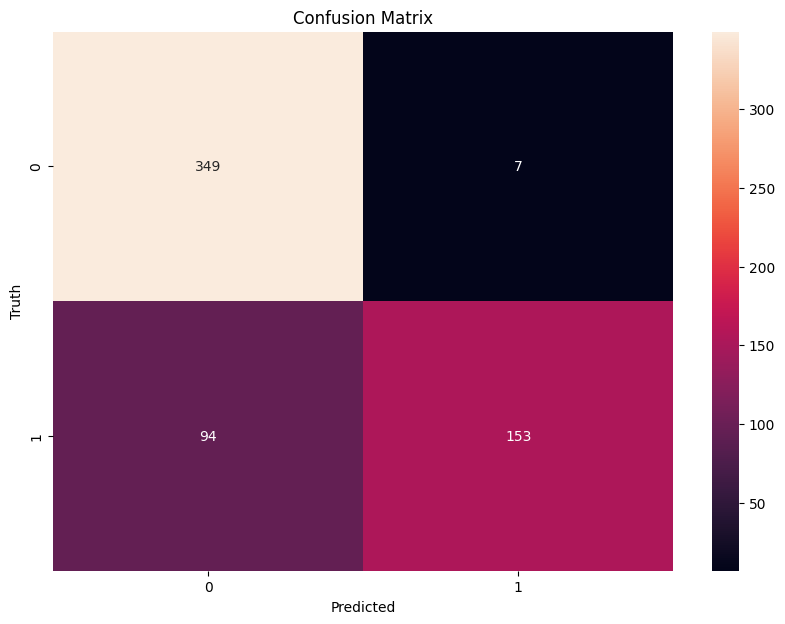

In [36]:
from scipy.io import loadmat
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
# Predictions
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.56).astype("int32")

# Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()


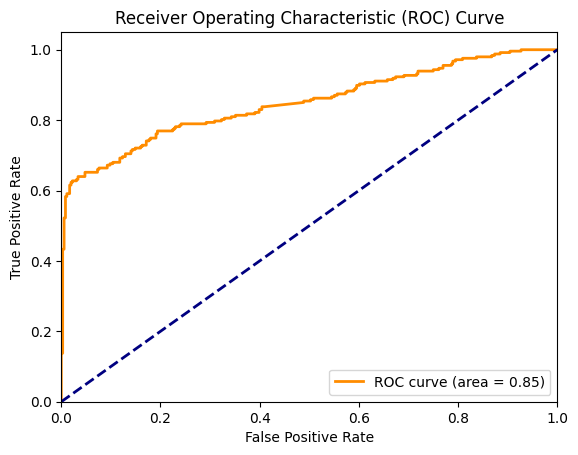

AUC: 0.848325979165719


In [37]:
# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {roc_auc}")


In [38]:
print(len(predictions))

603
